# Support Vector Machines

- **100 points**
- **Due Tuesday, *April* 12, 11:59 pm**

In this assignment, you'll be training support vector machines for classification.

### Instructions
- You are allowed to use machine learning libraries such as `scikit-learn` for this assignment. A few of the basic library methods have been already imported for you. Feel free to import any additional methods that you need.
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You are free to add any number of additional code blocks that you deem necessary. 
- Once you've filled out your solutions, submit the notebook on Canvas following the instructions [here](https://people.engr.tamu.edu/guni/csce421/assignments.html).
- Do **NOT** forget to type in your name and UIN at the beginning of the notebook.
- Do **NOT** remove any code provided.

In [ ]:
# importing libraries
import sys
import pickle

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 (10 points)

## Data Preprocessing

For this assignment, we will use the Statlog dataset. This database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood. The aim is to predict this classification, given the multi-spectral values. In the sample database, the class of a pixel is coded as a number. The attributes are numerical, in the range 0 to 255. More information about the database can be found [here](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29).

In [ ]:
# Read the data
train_df = pd.read_csv('http://people.tamu.edu/~sumedhpendurkar/csce633/satimage_train.csv')
test_df = pd.read_csv('http://people.tamu.edu/~sumedhpendurkar/csce633/satimage_test.csv')

In [ ]:
train_df.head().T

,0,1,2,3,4
Class,6.000000,6.000000,6.000000,6.000000,6.000000
X1,NaN,NaN,0.562500,NaN,NaN
X2,0.127273,-0.090909,0.490909,-0.018182,-0.018182
X3,-0.095238,-0.571429,0.333333,-0.380952,-0.285714
X4,-0.289256,-0.603306,-0.074380,-0.471074,-0.471074
X5,0.032258,-0.096774,0.354839,-0.225806,0.032258
X6,0.054545,-0.090909,0.327273,-0.163636,-0.090909
X7,-0.157895,-0.494737,0.052632,-0.410526,-0.326316
X8,-0.265625,-0.562500,-0.187500,-0.437500,-0.500000
X9,-0.250000,-0.250000,0.187500,-0.375000,-0.125000


### To-do steps
1. Remove rows with `NaN` values from `df_train` and `df_test`.
2. Create `X_train` and `X_test` by selecting columns `X1` through `X36`. Create `y_train` and `y_test` by selecting column `Class`.
2. Normalize `X_train` using `MinMaxScaler` from scikit-learn. Then normalize `X_test` on the normalization parameters derived from `X_train`.

In [ ]:
# Step 1: Drop NaN values
######################
#   YOUR CODE HERE   #
######################
train_df = train_df.dropna()
test_df = test_df.dropna()

# Step 2: Create train and test data
######################
#   YOUR CODE HERE   #
######################
X_train = train_df.iloc[:, 1:].copy()
X_test = test_df.iloc[:, 1:].copy()

y_train = train_df.loc[:, 'Class'].copy()
y_test = test_df.loc[:, 'Class'].copy()

# Step 3: Normalize data
######################
#   YOUR CODE HERE   #
######################
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert to binary classification
y_train[y_train != 6] = 0
y_train[y_train == 6] = 1

y_test[y_test != 6] = 0
y_test[y_test == 6] = 1

## Question 2 (30 points) 

## Hyperparameter Tuning 

Consider the binary classification that consists of distinguishing class 6 from the rest of the data points. Use SVMs combined with polynomial kernels to solve this classification problem. For each value of the polynomial degree, $d$ = 1, 2, 3, 4, plot the average 5-fold cross-validation error plus or minus one standard deviation as a function of $C$ (let the other parameters of the polynomial kernels be equal to their default values) on the training data.

**Choose a minimum of 5 $C$ values spread across a wide range**

**Report the best value of the trade-off constant $C$ measured on the training internal cross-validation.**

In [ ]:
def cross_validation_score(X, y, c_vals, n_folds, d_vals):
    """
    Calculates the cross validation error and returns its mean and standard deviation.
    
    Args:
        X: features
        y: labels
        c_vals: list of C values
        n_folds: number of cross-validation folds
        d_vals: list of degrees of the polynomial kernel
    
    Returns:
        Tuple of (list of error_mean, list of error_std)       
    """
    
    error_mean = np.zeros((len(c_vals),len(d_vals)))
    error_std = np.zeros((len(c_vals),len(d_vals)))
    
    ######################
    #   YOUR CODE HERE   #
    ######################
    sf5fold = StratifiedKFold(n_splits=5)
    for ci in range(len(c_vals)):
      for di in range(len(d_vals)):
        ksvm = SVC(C=c_vals[ci], kernel='poly', degree=d_vals[di])
        accuracy = cross_val_score(ksvm, X, y, scoring='accuracy', cv=sf5fold)
        error_mean[ci][di] = 1 - accuracy.mean()
        error_std[ci][di] = accuracy.std()
            
    return error_mean, error_std

In [ ]:
######################
#   YOUR CODE HERE   #
######################
n_folds = 5
d_vals= [1, 2, 3, 4]
c_vals = [1, 10, 20, 40, 80]

In [ ]:
error_mean, error_std = cross_validation_score(X_train, y_train, c_vals, n_folds, d_vals)

**Plot the average cross validation error.**

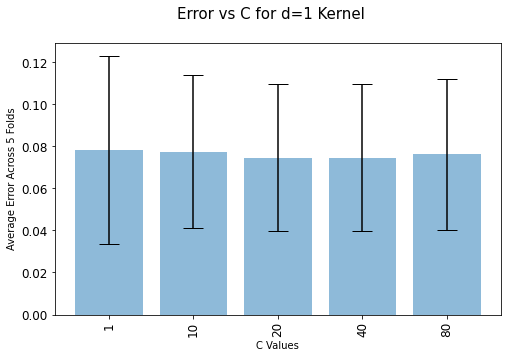

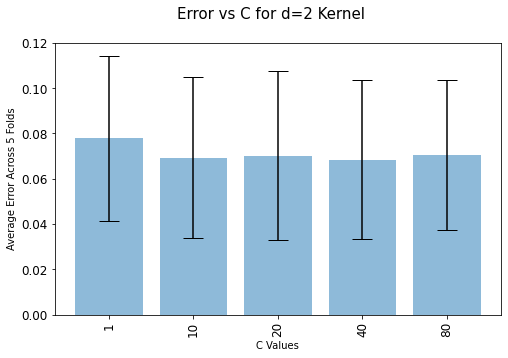

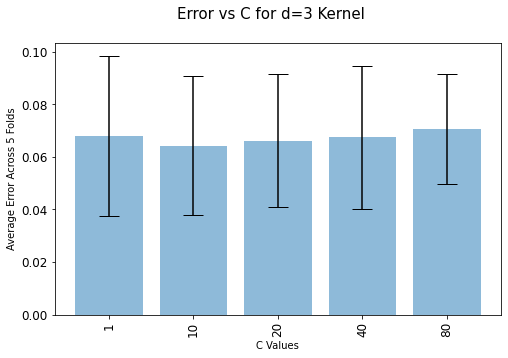

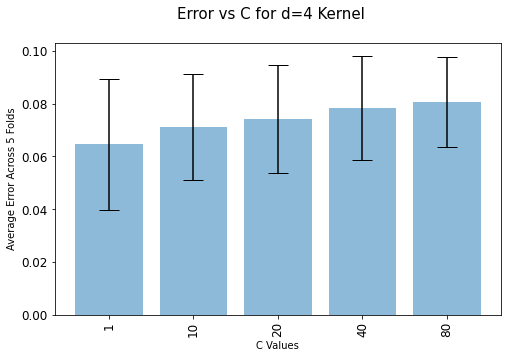

In [ ]:
for i,d_val in enumerate(d_vals):
    plt.rcParams.update({'font.size': 12})
    plt.figure(figsize = (8,5)) 
    plt.bar(range(len(c_vals)), error_mean[:,i], 
            yerr=error_std[:,i],
            align='center',
            alpha=0.5,
            ecolor='k',
            capsize=10,
            label = "Average Error")
    plt.suptitle('Error vs C for d={} Kernel'.format(d_val), fontsize=15)
    plt.xlabel('C Values', fontsize=10)
    plt.xticks(range(len(c_vals)), c_vals, rotation='vertical')
    plt.ylabel('Average Error Across {} Folds'.format(n_folds), fontsize=10)

**Plot $(C; d)$ pairs with their corresponding cross validation errors.**

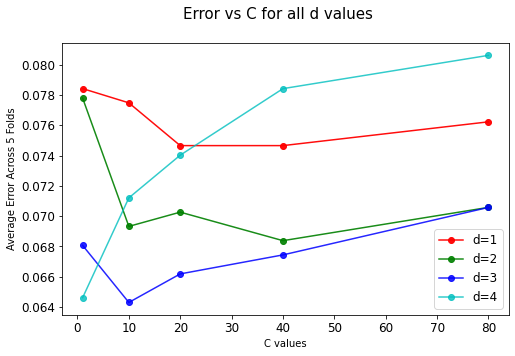

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5))
colors = ['r', 'g', 'b', 'c', 'y']
for i,d_val in enumerate(d_vals):
    plt.plot(c_vals, error_mean[:,i],
             marker='o', 
             color=colors[i%5], 
             alpha=1 - 0.2 * d_val/len(d_vals), 
             label = "d={}".format(d_val))
plt.suptitle('Error vs C for all d values', fontsize=15)
plt.xlabel('C values', fontsize=10)
plt.ylabel('Average Error Across {} Folds'.format(n_folds), fontsize=10)
plt.legend()

## Question 3 (30 points) 

## Model Training and Testing

**Build models on the full training data on the best $C$ value you found previously for each $d$ value using the 5-fold cross validation.**

You need to return test error, number of support vectors, number of margin violations, and margin size

A data point (i.e., x) is said to violate margin if **distance of data point 
from hyperplane < margin size**. Therefore, number of total margin violations is count of such data points present in dataset.


Hint: Margin Size: Use the dual coefficients (alpha values) of SVM along with support vectors to calculcate margin. Please refer to slide 17 in slide deck 13 for more details.

In [ ]:
def build_model(X_train, y_train, X_test, y_test, c_vals, d_vals):
    """
    Trains model on a dataset for given values of C and d. Returns the error on the test data,
    the number of support vectors, the number of margin violations, and the margin size.
    
    Args:
        X_train: features in training data
        y_train: train labels
        X_test: features in test data
        y_test: test labels
        c_vals: list of C values
        d_vals: list of degrees of the polynomial kernel
    
    Returns:
        Tuple of (error_test, support_vectors, margin_violations, margin_size)       
    """
    error_test = np.zeros(len(d_vals))
    support_vectors = np.zeros(len(d_vals))
    margin_violations = np.zeros(len(d_vals))
    margin_size = np.zeros(len(d_vals))
    
    ######################
    #   YOUR CODE HERE   #
    ######################
    for i in range(len(d_vals)):
      svmmodel = SVC(C=c_vals[i], kernel='poly', degree=d_vals[i])
      svmmodel.fit(X_train, y_train)
      #print("for i=", i)

      support_vectors[i] = len(svmmodel.support_) #############

      w = np.dot(svmmodel.dual_coef_, svmmodel.support_vectors_)
      #print(w)
      w_norm2 = np.linalg.norm(w, ord=2)
      #print("norm2 of w =", w_norm2)
      margin_size[i] = 1.0 / w_norm2  #####################
      #print("margin size is")
      #print(margin_size[i])

      distances = np.absolute(svmmodel.decision_function(X_train)) / w_norm2
      #print(distances)
      margin_violations[i] = 0
      for id in distances:
        if id<margin_size[i]:
          margin_violations[i] += 1 ###################
      
      #print("margin_violations=", margin_violations[i])

      error_test[i] = 1 - svmmodel.score(X_test, y_test) ############
      #print("err_test=", error_test[i])    
    
    return error_test, support_vectors, margin_violations, margin_size

In [ ]:
######################
#   YOUR CODE HERE   #
######################
d_vals= [1,2,3,4] # List of degrees
c_vals = [20,40,10,1] # Provide a list of corresponding best C values

In [ ]:
error_test, support_vectors, margin_violations, margin_size = build_model(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          c_vals, d_vals)

**Plot the test errors for each model, as a function of $d$.**

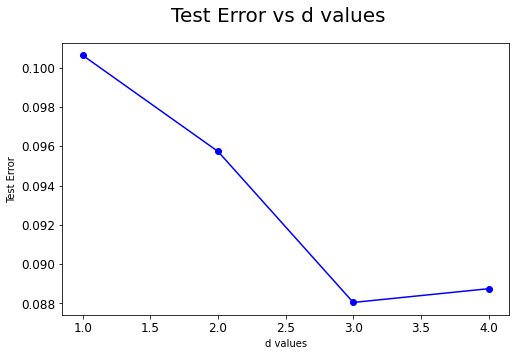

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, error_test ,marker='o', color='b')
plt.suptitle('Test Error vs d values', fontsize=20)
plt.xlabel('d values', fontsize=10)
plt.ylabel('Test Error', fontsize=10);

## Question 4 (10 points) 

## Number of support vectors

**Plot the number of support vectors obtained as a function of $d$.**

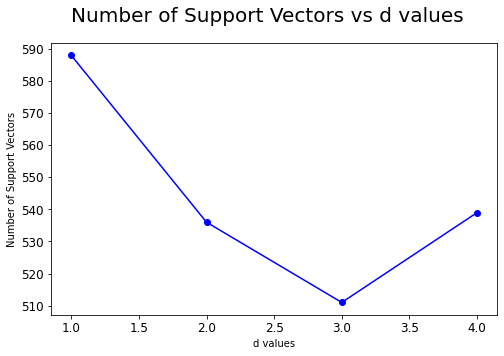

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, support_vectors, marker='o', color='b')
plt.suptitle('Number of Support Vectors vs d values', fontsize=20)
plt.xlabel('d values', fontsize=10)
plt.ylabel('Number of Support Vectors', fontsize=10);

## Question 5 (10 points)

## Number of Margin Violations

**Plot the number of support vectors that violate the margin hyperplanes as a function of $d.**

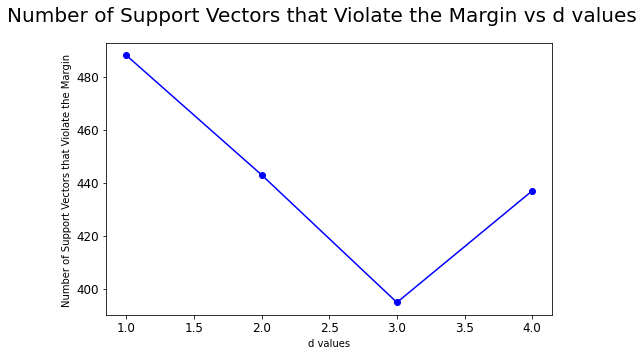

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, margin_violations, marker='o', color='b')
plt.suptitle('Number of Support Vectors that Violate the Margin vs d values', fontsize=20)
plt.xlabel('d values', fontsize=10)
plt.ylabel('Number of Support Vectors that Violate the Margin ', fontsize=10);

## Question 6 (10 points) 

## Margin Size vs Support Vectors

**Explain how the parameter $d$ infuences the model fit (plot the margin size as a function of $d).**

Make sure to plot **AND** explain.

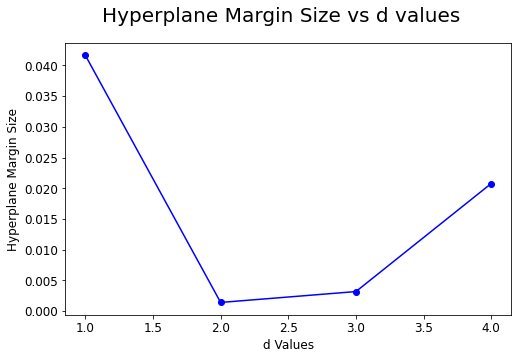

In [ ]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, margin_size, marker='o', color='b')
plt.suptitle('Hyperplane Margin Size vs d values', fontsize=20)
plt.xlabel('d Values', fontsize=12)
plt.ylabel('Hyperplane Margin Size', fontsize=12);

In [ ]:
## TYPE YOUR ANSWER BELOW
When d increases from 1 to 3, the test error decreases; when increasing d from 3 to 4, the test error increases. 
So d=3 is the best model fit here regarding the test error, with the minimum test error.


SyntaxError: ignored